In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Data - A1.csv')
data.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


# Preprocessing

In [4]:
mean_x = data['X'].mean()
std_x = data['X'].std()

print(f'Mean: {mean_x} | Stddev: {std_x}')

Mean: -4.440892098500626e-18 | Stddev: 0.5782170892807795


In [5]:
data['X'] = (data['X'] - mean_x) / (std_x)
data.head()

,X,Y
0,1.708680,5.098368
1,1.244722,2.516654
2,-0.697668,0.337961
3,0.185237,0.737320
4,0.597259,-0.780955


In [6]:
data = data.sample(frac=1, random_state=42)

split_frac = int(0.8 * len(data))

train_data = data[:split_frac]
test_data = data[split_frac:]

In [7]:
print(f'TotalLen: {len(data)} | TrainLen: {len(train_data)} | TestLen: {len(test_data)}')

TotalLen: 1000 | TrainLen: 800 | TestLen: 200


# Polynomial Regression

In [8]:
def create_pol(X, degree):
    return np.column_stack([X ** i for i in range(1, degree + 1)])

X = np.array([1, 2, 3])
print(create_pol(X, 2))

[[1 1]
 [2 4]
 [3 9]]


In [9]:
degrees = [_ for _ in range(1, 10)]
print(degrees)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
X_train = train_data['X'].values
X_test = test_data['X'].values
y_train = train_data['Y'].values
y_test = test_data['Y'].values

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800,) (200,) (800,) (200,)


## Training

In [11]:
lr, num_itrs = 0.00005, 5000

mses = []
ws, bs = [], []

for degree in degrees:
    X_pol = create_pol(X_train, degree)    
    print(f'Shape of X_pol: {X_pol.shape}')

    w = np.zeros(X_pol.shape[1])
    print(f'Shape of w: {w.shape}')
    
    b = 0
    
    for _ in range(num_itrs):
        prediction = X_pol.dot(w) + b
        gradient_w = (1/len(train_data)) * X_pol.T.dot(prediction - y_train)
        gradient_b = (1/len(train_data)) * np.sum(prediction - y_train)
        
        w -= lr * gradient_w
        b -= lr * gradient_b
        
    ws.append(w)
    bs.append(b)
        
    mse = np.mean((X_pol.dot(w) + b - y_train)**2)
    mses.append(mse)

Shape of X_pol: (800, 1)
Shape of w: (1,)
Shape of X_pol: (800, 2)
Shape of w: (2,)
Shape of X_pol: (800, 3)
Shape of w: (3,)
Shape of X_pol: (800, 4)
Shape of w: (4,)
Shape of X_pol: (800, 5)
Shape of w: (5,)
Shape of X_pol: (800, 6)
Shape of w: (6,)
Shape of X_pol: (800, 7)
Shape of w: (7,)
Shape of X_pol: (800, 8)
Shape of w: (8,)
Shape of X_pol: (800, 9)
Shape of w: (9,)


In [12]:
mses

[3.0916736555542004,
 2.8398747674250546,
 1.5152331644313852,
 1.4861174558824417,
 1.3144365613546969,
 1.3561659877360952,
 1.4382960010121946,
 1.4053050848136885,
 1.3219659671476875]

# Plot

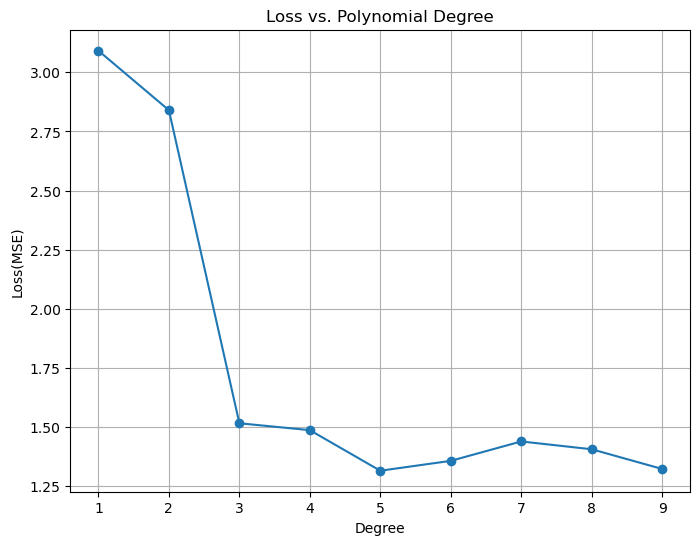

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(degrees, mses, marker='o', linestyle='-')
plt.title("Loss vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Loss(MSE)")
plt.grid(True)

plt.show()

In [14]:
map = {}

for idx, mse in enumerate(mses):
    deg = idx + 1
    map[deg] = mse

In [15]:
sorted_map = dict(sorted(map.items(), key=lambda x: x[1]))
sorted_map

{5: 1.3144365613546969,
 9: 1.3219659671476875,
 6: 1.3561659877360952,
 8: 1.4053050848136885,
 7: 1.4382960010121946,
 4: 1.4861174558824417,
 3: 1.5152331644313852,
 2: 2.8398747674250546,
 1: 3.0916736555542004}

In [16]:
best_degree = min(map, key=map.get)
print(f'The best degree for the polynomial regression is: {best_degree}')

The best degree for the polynomial regression is: 5


## Testing

In [17]:
ws

[array([0.30977722]),
 array([0.30851314, 0.20144935]),
 array([0.19980328, 0.1964264 , 0.44317827]),
 array([0.19842761, 0.10749792, 0.44005184, 0.14918093]),
 array([0.07524089, 0.10559966, 0.1295889 , 0.143805  , 0.24985973]),
 array([0.07554243, 0.07907485, 0.12989274, 0.06654409, 0.24989366,
        0.03016426]),
 array([0.06916273, 0.08004834, 0.08779668, 0.06748371, 0.10291498,
        0.02986062, 0.0603148 ]),
 array([ 0.06913272,  0.08576446,  0.08776592,  0.08253767,  0.10290738,
         0.06978388,  0.06043613, -0.01989824]),
 array([ 0.07069501,  0.08554624,  0.0948622 ,  0.08225259,  0.12643858,
         0.06952333,  0.13210658, -0.01965898, -0.03189329])]

In [18]:
bs

[0.21931708614262116,
 0.1936363045688494,
 0.1912644585167097,
 0.15371887688789726,
 0.15322720050790742,
 0.1467348064681672,
 0.14746125699954613,
 0.1495329364655089,
 0.1493733810911368]

In [19]:
test_mses = []

for degree in degrees:
    X_pol = create_pol(X=X_test, degree=degree)
    
    prediction = X_pol.dot(ws[degree - 1]) + bs[degree - 1]
    
    testing_mse = np.mean((prediction - y_test) ** 2)
    
    test_mses.append(testing_mse)


In [20]:
test_mses

[2.878899997328865,
 2.7509950566411283,
 1.5157406704834537,
 1.5450186222026416,
 1.3711806765957215,
 1.4041142659956067,
 1.4842426027648081,
 1.466193826542002,
 1.3914747172135542]

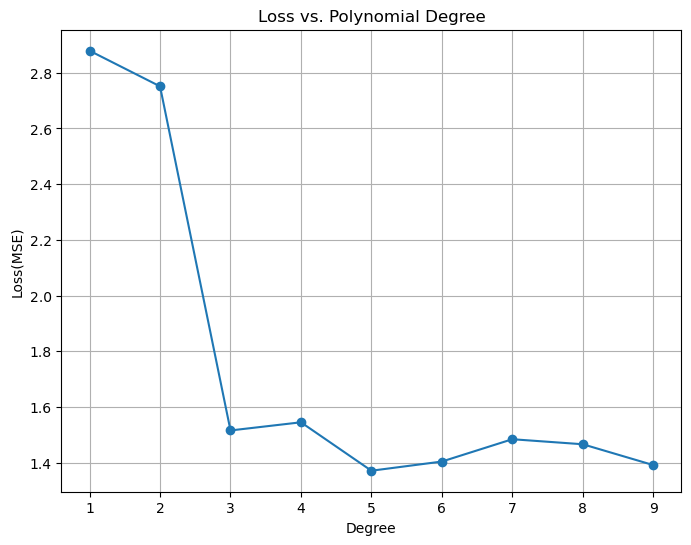

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, test_mses, marker='o', linestyle='-')
plt.title("Loss vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Loss(MSE)")
plt.grid(True)

plt.show()

In [22]:
map = {}

for idx, mse in enumerate(test_mses):
    deg = idx + 1
    map[deg] = mse
    
sorted_map = dict(sorted(map.items(), key=lambda x: x[1]))
sorted_map

{5: 1.3711806765957215,
 9: 1.3914747172135542,
 6: 1.4041142659956067,
 8: 1.466193826542002,
 7: 1.4842426027648081,
 3: 1.5157406704834537,
 4: 1.5450186222026416,
 2: 2.7509950566411283,
 1: 2.878899997328865}

In [23]:
best_degree = min(map, key=map.get)
print(f'The best degree for the polynomial regression is: {best_degree}')

The best degree for the polynomial regression is: 5


In [24]:
w_best, b_best = ws[best_degree - 1], bs[best_degree - 1]
w_best, b_best, type(w_best)

(array([0.07524089, 0.10559966, 0.1295889 , 0.143805  , 0.24985973]),
 0.15322720050790742,
 numpy.ndarray)

In [25]:
X_vals = data['X']*std_x + mean_x
X_vals = X_vals.values

coefficients = w_best

y_vals = np.zeros_like(X_vals)

for degree, coeff in enumerate(coefficients):
    y_vals += coeff * (X_vals ** (degree + 1))
    
y_vals += b_best

In [26]:
X_vals.shape, y_vals.shape, X_vals[:10], y_vals[:10], min(X_vals), max(X_vals)

((1000,),
 (1000,),
 array([-0.85185185, -0.85385385,  0.15915916, -0.61761762, -0.21921922,
        -0.13313313, -0.43543544, -0.14314314,  0.14914915, -0.37537538]),
 array([0.04930299, 0.04833801, 0.16851776, 0.11497859, 0.14064815,
        0.14481077, 0.13104637, 0.14428599, 0.167318  , 0.134002  ]),
 -1.0,
 1.0)

In [27]:
X_vals = np.linspace(-1, 1, 100)
y_vals = b_best + np.polyval(coefficients, X_vals)

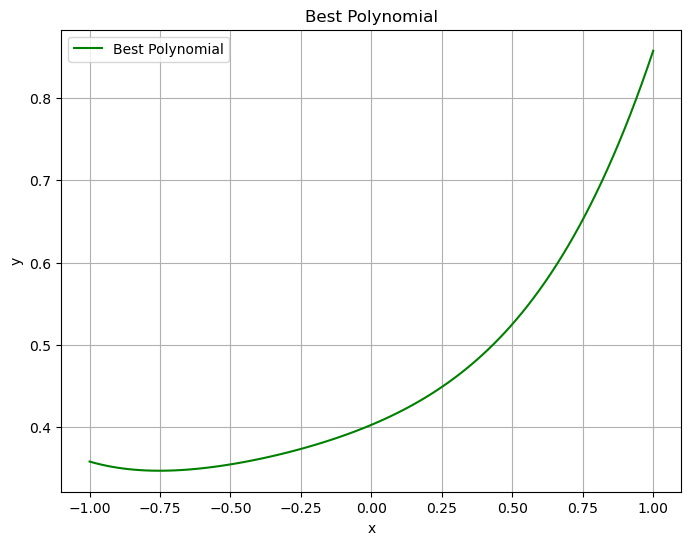

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(X_vals, y_vals, label='Best Polynomial', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Polynomial')
plt.legend()
plt.grid(True)
plt.show()

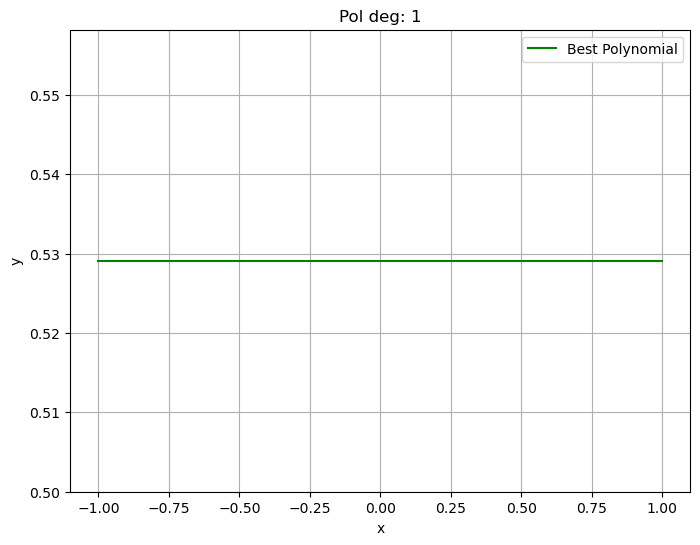

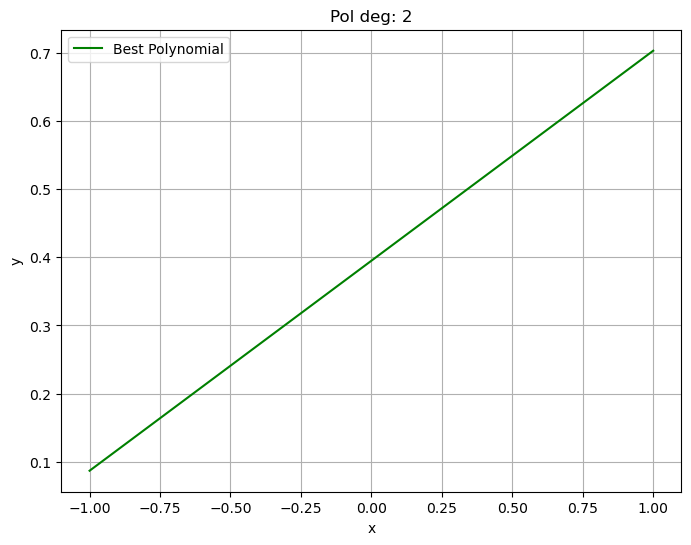

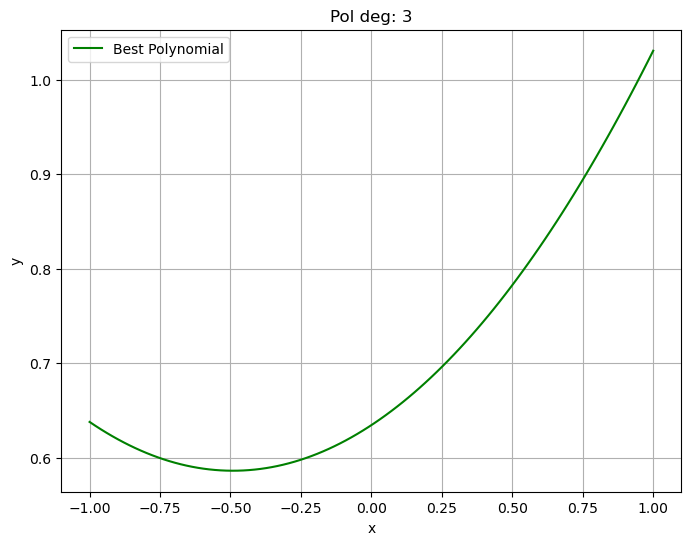

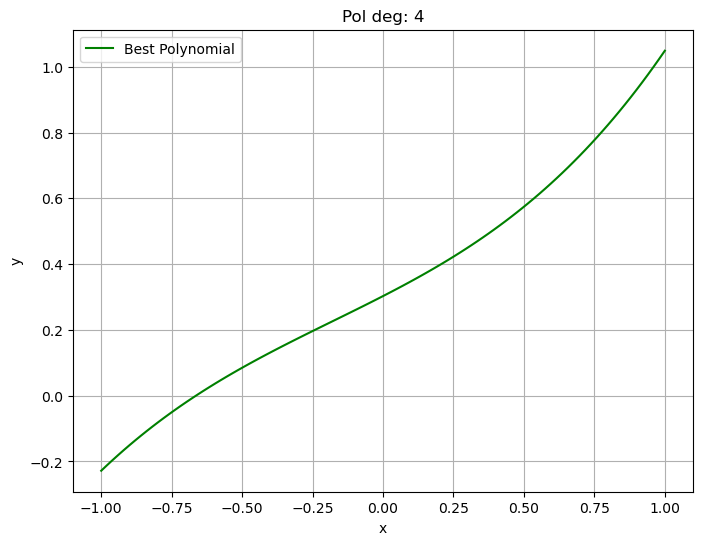

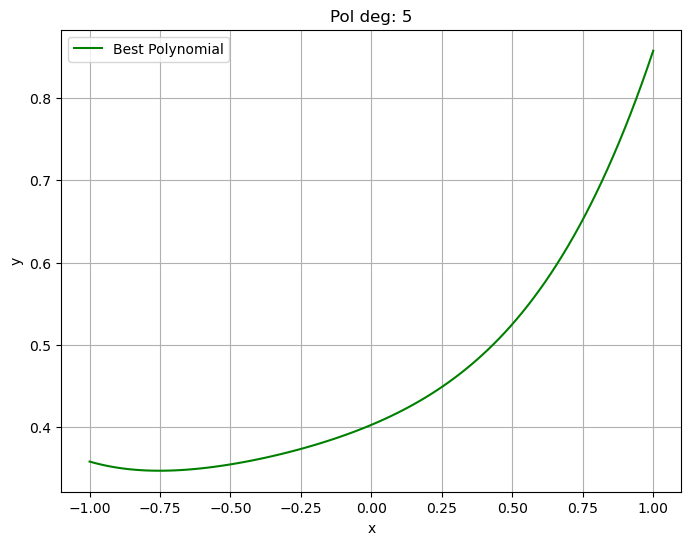

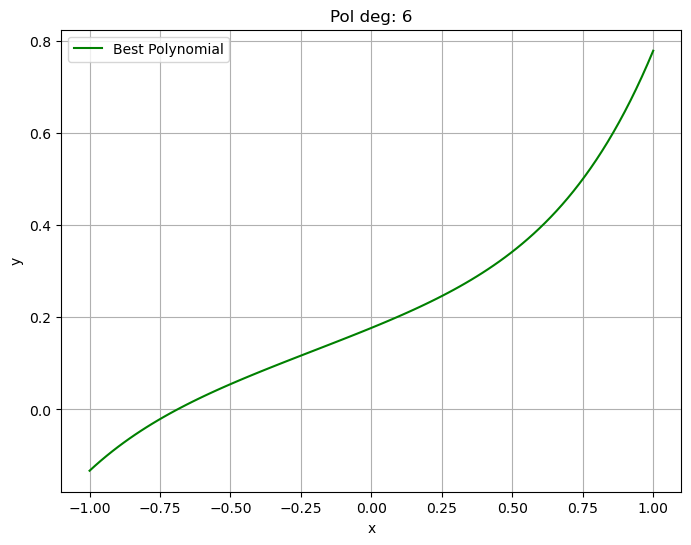

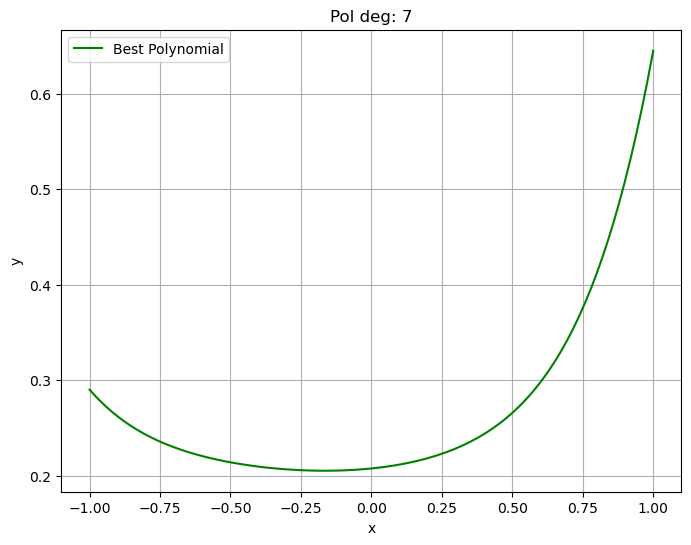

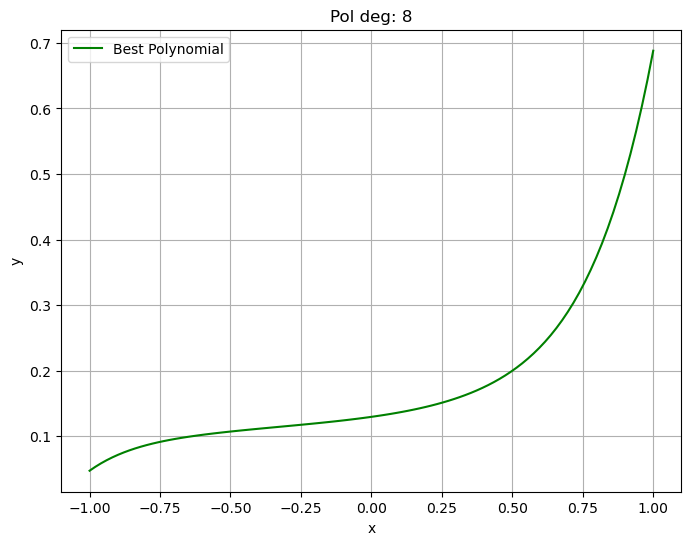

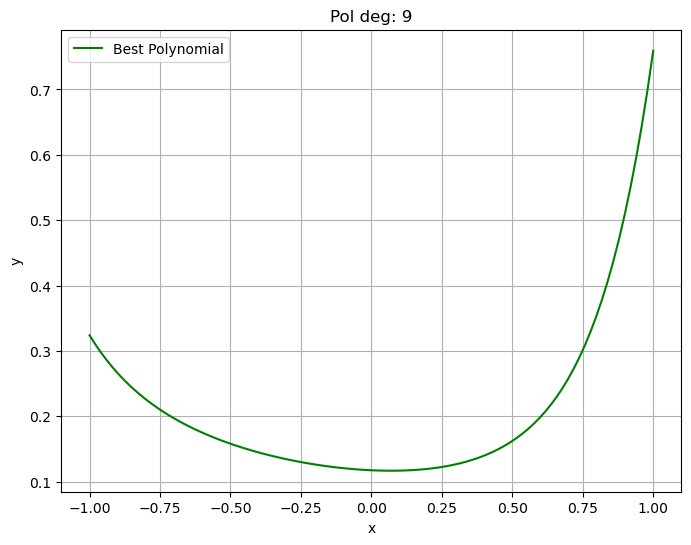

In [30]:
X_vals = np.linspace(-1, 1, 100)

for t in range(9):
    y_vals = bs[t] + np.polyval(ws[t], X_vals)
    plt.figure(figsize=(8, 6))
    plt.plot(X_vals, y_vals, label='Best Polynomial', color='g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Pol deg: {t + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()